# Project 2: Andreas Lemos, Omar Kapur, Samantha Williams
## w200 | Thursday 4pm PST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline


In [3]:
#Read in the IMDB csv data
df = pd.read_csv('IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# Basic Data Exploration

In [15]:
#What are the different data types contained? 

print('Different Data Types')
df.dtypes

Different Data Types


Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [14]:
#Are there any missing values and how many? 

print('Missing Values in Columns')
df.isnull().sum()

Missing Values in Columns


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [16]:
#how many rows and columns in the data?

print('Dataset Shape')
df.shape

Dataset Shape


(1000, 12)

In [17]:
#what is the average Runtime in Minutes? 

print('Average Runtime in Minutes')
df['Runtime (Minutes)'].mean()

Average Runtime in Minutes


113.172

In [18]:
#What is the average Revenue? 

print('Average Revenue (Millions)')
df['Revenue (Millions)'].mean()

Average Revenue (Millions)


82.95637614678897

In [31]:
#How many films were released in each year? 

print('Films Released In A Year')
df.Year.value_counts()

Films Released In A Year


2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

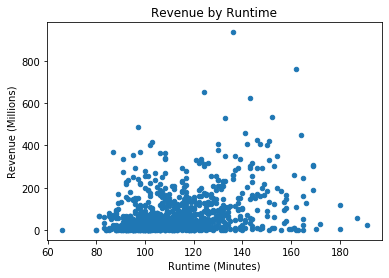

In [19]:
#what does Revenue and Runtime look like? Is there a runtime that always brings in larger Revenue dollars? 
#Is there such a thing as too long of a film that will have a negative impact on Revenue?

df.plot('Runtime (Minutes)', 'Revenue (Millions)', kind='scatter', title ='Revenue by Runtime');

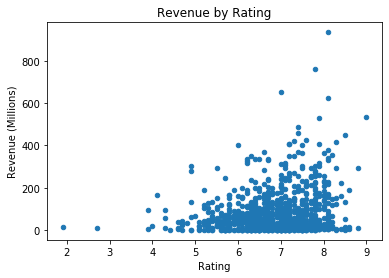

In [20]:
#How does Rating and Revenue relate to one another? Is there a low rated film that has a high Revenue?
#Does not appear to be the case even with the two outliers.
#Remember this is 1000 popular movies from IMDB

df.plot('Rating', 'Revenue (Millions)', kind='scatter', title='Revenue by Rating');

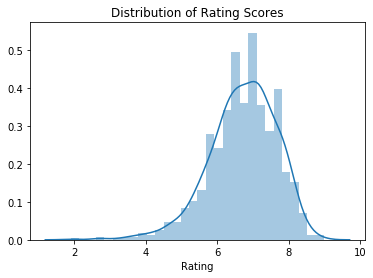

In [26]:
#What is the distribution of the variable Rating? 

_ = sns.distplot(df.Rating).set_title('Distribution of Rating Scores')

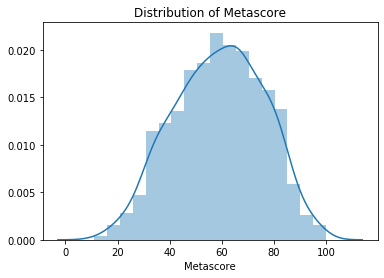

In [30]:
#What is the distribuiton of the variable Metascore? 

_ = sns.distplot(df.Metascore.dropna(axis=0, how='any',)).set_title('Distribution of Metascore')

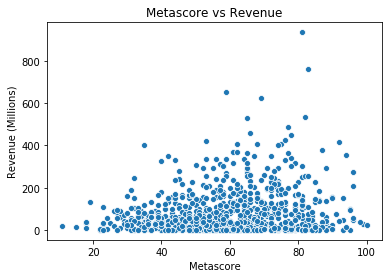

In [28]:
#How does Metascore and Revenue relate to one another? 
#Remember this is 1000 popular movies from IMDB

fig, ax = plt.subplots()
_ = sns.scatterplot(x='Metascore',y='Revenue (Millions)',data=df,ax=ax).set_title('Metascore vs Revenue')

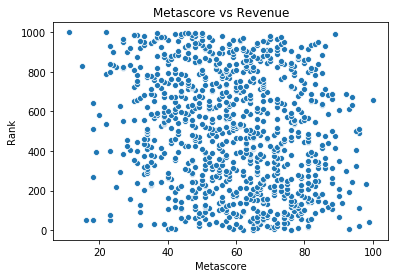

In [56]:
#How does Metascore and Rank compare?

fig, ax = plt.subplots()
_ = sns.scatterplot(x='Metascore',y='Rank',data=df,ax=ax).set_title('Metascore vs Revenue')

In [24]:
#What can we learn from Count, Mean, Standard Deviation, Min and Max, using the describe function.
#Not all of these fields are helpful as but we can get an idea of the average Runtime, Rating and Revenue.

desc_cols = ['Rank','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']
df[desc_cols].describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


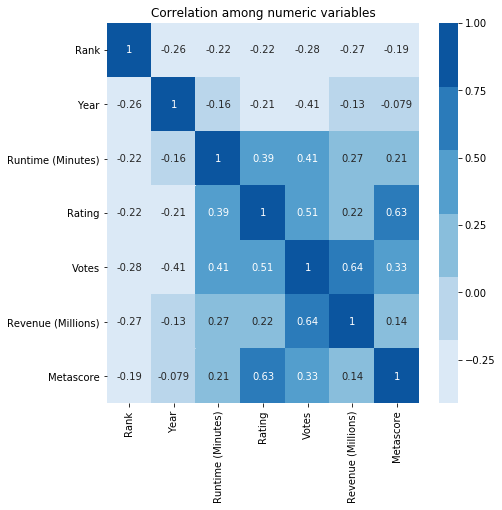

In [25]:
#How does variable relate to the other using a heat map? 

fig, ax = plt.subplots(figsize=(7,7))
_ = sns.heatmap(df[desc_cols].corr(),annot=True,cmap=sns.color_palette("Blues"),ax=ax).set_title('Correlation among numeric variables')

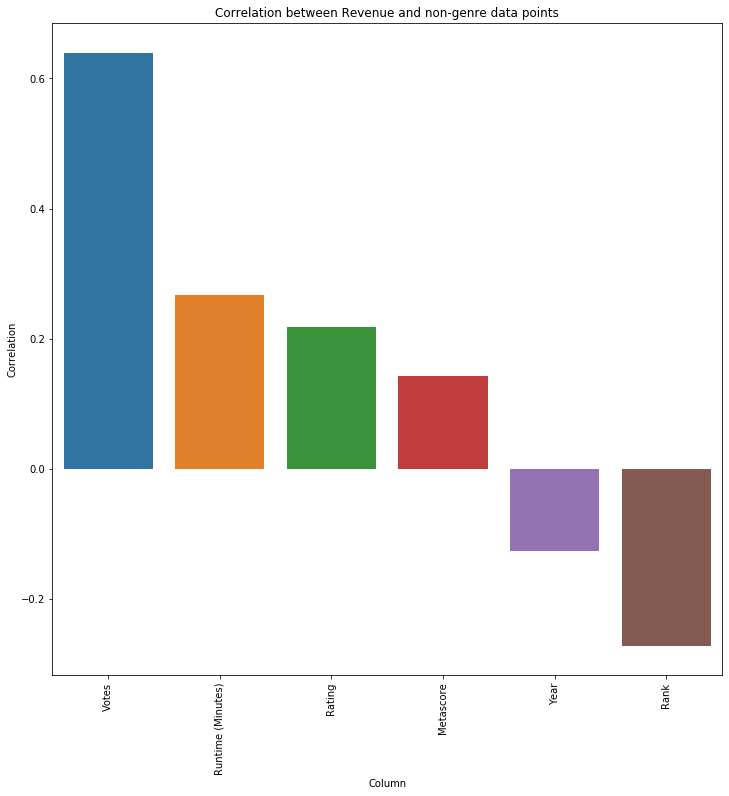

In [32]:
#What is the Correlation Between Revenue and other Variables (Excluding Genre)? 

fig, ax = plt.subplots(figsize=(12,12))
correlations = df[desc_cols].corr()['Revenue (Millions)'][:]
correlations = pd.DataFrame(correlations.reset_index().rename(columns={'index':'Column','Revenue (Millions)':'Correlation'}))
correlations = correlations[correlations.Column != 'Revenue (Millions)'].sort_values('Correlation',ascending=False)
sns.barplot(x='Column',y='Correlation',data=correlations).set_title('Correlation between Revenue and non-genre data points')
_ = plt.xticks(rotation = 90)

# Film Genre Exploration

In [34]:
#This is counting genres and unique combinations when a film has more than one genre listed.

print('Unique Genres Counts')
df.Genre.value_counts().head(10)

Unique Genres Counts


Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

In [21]:
#How many unique genres are there?

print('Unique Genres')
df.Genre.nunique()

Unique Genres


207

In [33]:
#Exploring Genre data, need to break out details and check our changes to the dataset are correct. 

df = pd.concat([df, df['Genre'].str.get_dummies(sep=',')],axis=1)

print('Number of rows in data set: {}'.format(len(df)))
print('Number of unique Titles in data set: {}'.format(len(df.Title.unique())))
print('   Duplicates are: {}'.format(list(df[df.Title.duplicated()].Title)))
print('\nMoves from {} to {} are included'.format(df.Year.min(), df.Year.max()))
print('The mean Rating is {:.2f} and the mean Metascore is {:.2f}'.format(df.Rating.mean(), df.Metascore.mean()))
print('The mean Runtime is {:.0f} minutes and the mean Revenue is ${:.2f} million'.format(df['Runtime (Minutes)'].mean(), df['Revenue (Millions)'].mean()))

genres = [item for row in df.Genre for item in row.split(',')]
genres = sorted(set(genres))
print('\nThe Genres represented are: \n{}'.format(genres))
print()
df.head()

Number of rows in data set: 1000
Number of unique Titles in data set: 999
   Duplicates are: ['The Host']

Moves from 2006 to 2016 are included
The mean Rating is 6.72 and the mean Metascore is 58.99
The mean Runtime is 113 minutes and the mean Revenue is $82.96 million

The Genres represented are: 
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']



,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# how many dummy positives are there?

print('Total Genre Count')
df[genres].sum(axis=0)

Total Genre Count


Action       303
Adventure    259
Animation     49
Biography     81
Comedy       279
Crime        150
Drama        513
Family        51
Fantasy      101
History       29
Horror       119
Music         16
Musical        5
Mystery      106
Romance      141
Sci-Fi       120
Sport         18
Thriller     195
War           13
Western        7
dtype: int64

In [37]:
#What is the Revenue by Genre?

check = df[genres + ['Revenue (Millions)']].copy()
for x in genres:
    check[x+'_revenue'] = check[x] * check['Revenue (Millions)']
rev_columns = [x for x in check.columns if '_revenue' in x]
check = check[rev_columns]
check.columns = [x.split('_')[0] for x in check.columns]
check = check.sum(axis=0)

print('Total Revenue (Millions) by Genre')
check

Total Revenue (Millions) by Genre


Action       35605.42
Adventure    38852.61
Animation     8987.50
Biography     4185.12
Comedy       19316.45
Crime         8034.62
Drama        21931.45
Family        6182.61
Fantasy      12262.06
History       1376.02
Horror        3413.59
Music          706.05
Musical        408.21
Mystery       4861.86
Romance       5482.89
Sci-Fi       14910.78
Sport         1040.68
Thriller     10645.32
War            534.33
Western        559.12
dtype: float64

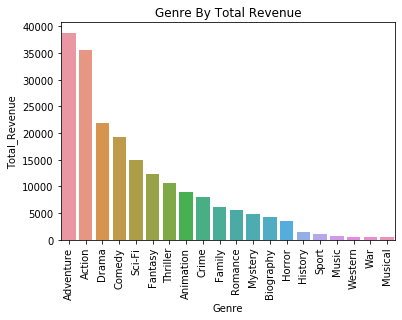

In [38]:
#What does this look like on a plot? 

genre_revenue = pd.DataFrame(check.reset_index().rename(columns={'index':'Genre',0:'Total_Revenue'})).sort_values('Total_Revenue',ascending=False)
sns.barplot(x = genre_revenue.Genre, y = genre_revenue.Total_Revenue).set_title('Genre By Total Revenue')
_ = plt.xticks(rotation = 90)

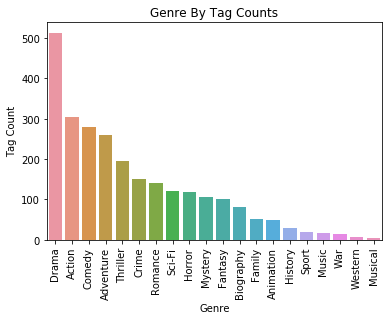

In [39]:
#How does this differ from Genre tags? 

genre_tag_counts = pd.DataFrame(df[genres].sum(axis=0)).reset_index().rename(columns={'index':'Genre',0:'Tag Count'}).sort_values('Tag Count',ascending=False)
sns.barplot(x = genre_tag_counts.Genre, y = genre_tag_counts['Tag Count']).set_title('Genre By Tag Counts')
_ = plt.xticks(rotation = 90)

In [40]:
#Some Addititional Questions: 

print('Number of movies that ARE Action and NOT Adventure: {}'.format(sum((df.Action == 1) & (df.Adventure == 0))))
print('Number of movies that are NOT Action and ARE Adventure: {}'.format(sum((df.Action == 0) & (df.Adventure == 1))))
print('Number of movies that are BOTH Action and Adventure: {}'.format(sum((df.Action == 1) & (df.Adventure == 1))))

Number of movies that ARE Action and NOT Adventure: 148
Number of movies that are NOT Action and ARE Adventure: 104
Number of movies that are BOTH Action and Adventure: 155


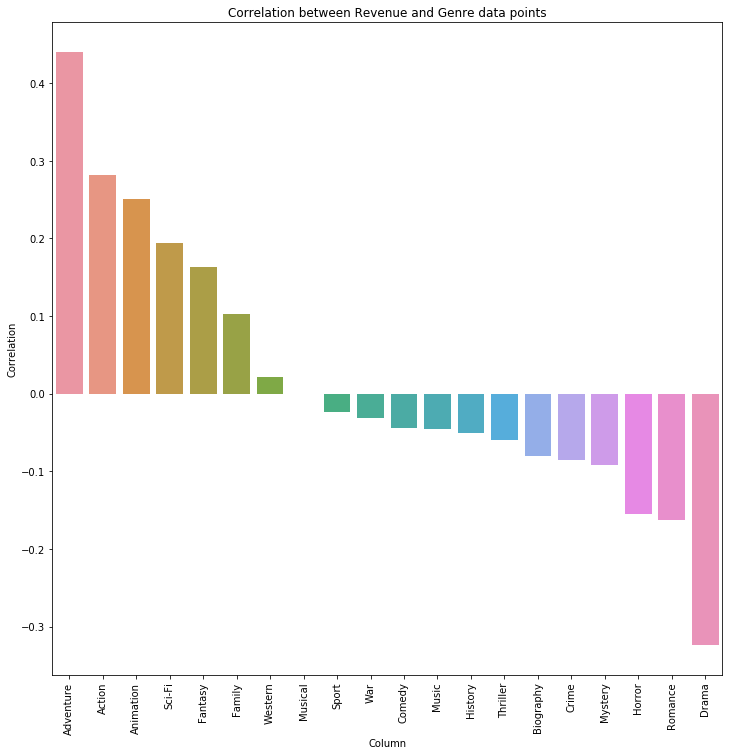

In [41]:
#What is the correlation between Genre and Revenue? 

fig, ax = plt.subplots(figsize=(12,12))
correlations = df[genres + ['Revenue (Millions)']].corr()['Revenue (Millions)'][:]
correlations = pd.DataFrame(correlations.reset_index().rename(columns={'index':'Column','Revenue (Millions)':'Correlation'}))
correlations = correlations[correlations.Column != 'Revenue (Millions)'].sort_values('Correlation',ascending=False)
sns.barplot(x='Column',y='Correlation',data=correlations).set_title('Correlation between Revenue and Genre data points')
_ = plt.xticks(rotation = 90)

In [42]:
#What is the mean Revenue by Genre?

columns = ['Mean Revenue (Millions)']

df_rev_by_genre = pd.DataFrame(index=genres, columns=columns)
df_rev_by_genre = df_rev_by_genre.fillna(0)

for genre in genres:
    means = (df[(df[genre]==1)])['Revenue (Millions)'].mean()
    df_rev_by_genre.loc[genre, 'Mean Revenue (Millions)'] = means

df_rev_by_genre = df_rev_by_genre.sort_values('Mean Revenue (Millions)')
print(df_rev_by_genre)

           Mean Revenue (Millions)
Horror                   36.705269
Romance                  42.503023
Music                    47.070000
Drama                    49.844205
History                  52.923846
War                      53.433000
Mystery                  54.627640
Biography                55.801600
Crime                    61.804769
Sport                    65.042500
Thriller                 69.577255
Comedy                   75.750784
Musical                  81.642000
Western                 111.824000
Action                  124.494476
Family                  126.175714
Fantasy                 131.850108
Sci-Fi                  135.552545
Adventure               154.177024
Animation               191.223404


Text(0.5, 1.0, 'Mean Revenue by Genre')

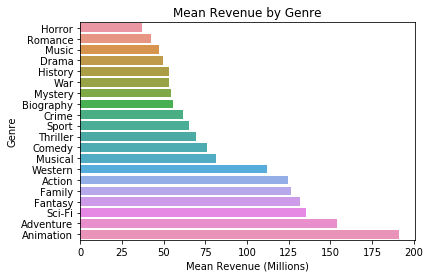

In [43]:
#what does this look like as a plot? 

fig, ax = plt.subplots()
_ = sns.barplot(x='Mean Revenue (Millions)',y='index', data=df_rev_by_genre.reset_index(),ax=ax)
plt.ylabel('Genre')
plt.xlabel('Mean Revenue (Millions)')
plt.title('Mean Revenue by Genre')

# Directors and Actors Exploration

In [44]:
#Create a dataframe with Mean Revenue and Movie Count by Director

df_director = df.groupby(['Director'])[['Revenue (Millions)']].agg(['mean', 'count'])
df_director.columns = ['Mean_Revenue_M', 'Movie_Count']
df_director = df_director.sort_values('Mean_Revenue_M')
df_director = df_director[df_director['Mean_Revenue_M'].notna()]
df_director['Mean_Rev_Per_Movie'] = df_director['Mean_Revenue_M'] / df_director['Movie_Count']
df_director

,Mean_Revenue_M,Movie_Count,Mean_Rev_Per_Movie
Director,,,
Andy Goddard,0.000000,1,0.000000
Phillip Guzman,0.010000,1,0.010000
Robin Swicord,0.010000,1,0.010000
Patricia Rozema,0.010000,1,0.010000
So Yong Kim,0.010000,1,0.010000
Gus Van Sant,0.020000,1,0.020000
Jim Mickle,0.020000,1,0.020000
Oz Perkins,0.020000,1,0.020000
Jon Kasdan,0.020000,1,0.020000


Text(0.5, 1.0, 'Mean Revenue by Directors (Top 10)')

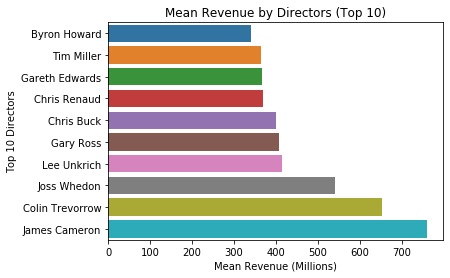

In [45]:
#Plot the top 10 Directors by Revenue

top_directors_rev = df_director.tail(10)

fig, ax = plt.subplots()
_ = sns.barplot(x='Mean_Revenue_M',y='Director', data=top_directors_rev.reset_index(),ax=ax)
plt.ylabel('Top 10 Directors')
plt.xlabel('Mean Revenue (Millions)')
plt.title('Mean Revenue by Directors (Top 10)')

In [48]:
#How many movies did the top 10 Directors make from 2006 to 2016? 

top_directors_count = df_director.sort_values('Movie_Count').tail(10)
print(top_directors_count)

                    Mean_Revenue_M  Movie_Count  Mean_Rev_Per_Movie
Director                                                           
Justin Lin              164.958000            5           32.991600
M. Night Shyamalan       74.098000            5           14.819600
Woody Allen              28.238000            5            5.647600
Christopher Nolan       303.018000            5           60.603600
David Fincher           105.544000            5           21.108800
J.J. Abrams             336.690000            5           67.338000
Michael Bay             236.886667            6           39.481111
Paul W.S. Anderson       34.820000            6            5.803333
David Yates             271.751667            6           45.291944
Ridley Scott             89.882500            8           11.235313


Text(0.5, 1.0, 'Mean Revenue by Directors (Top 10)')

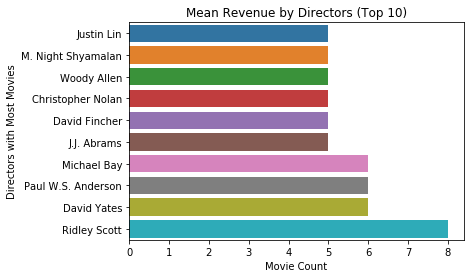

In [47]:
#Plot of top 10 Directors film count 

fig, ax = plt.subplots()
_ = sns.barplot(x='Movie_Count',y='Director', data=top_directors_count.reset_index(),ax=ax)
plt.ylabel('Directors with Most Movies')
plt.xlabel('Movie Count')
plt.title('Mean Revenue by Directors (Top 10)')

In [49]:
#Of the top Directors what was there mean Revenue per film that they made? 
#All only made one film that made the list of most popular films from 2006-2016! 

top_directors_mean_rev = df_director.sort_values('Mean_Rev_Per_Movie').tail(10)
print(top_directors_mean_rev)

                 Mean_Revenue_M  Movie_Count  Mean_Rev_Per_Movie
Director                                                        
David Slade              300.52            1              300.52
Kyle Balda               336.03            1              336.03
Byron Howard             341.26            1              341.26
Tim Miller               363.02            1              363.02
Chris Renaud             368.31            1              368.31
Chris Buck               400.74            1              400.74
Gary Ross                408.00            1              408.00
Lee Unkrich              414.98            1              414.98
Colin Trevorrow          652.18            1              652.18
James Cameron            760.51            1              760.51


Text(0.5, 1.0, 'Mean Revenue per Movie by Directors (Top 10)')

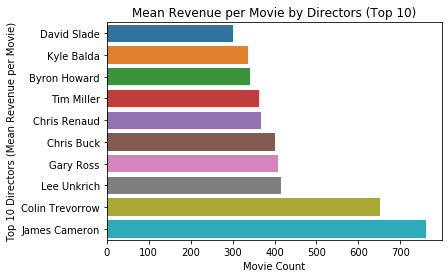

In [50]:
#Plot of top directors by mean Revenue (They each only had one film that made the list)

fig, ax = plt.subplots()
_ = sns.barplot(x='Mean_Rev_Per_Movie',y='Director', data=top_directors_mean_rev.reset_index(),ax=ax)
plt.ylabel('Top 10 Directors (Mean Revenue per Movie)')
plt.xlabel('Movie Count')
plt.title('Mean Revenue per Movie by Directors (Top 10)')

In [51]:
#How many actors are listed in the Actor Variable? 
#999 rows have 4 actors listed and 1 row has 3 actors listed

check = df.copy()
check['Actor_list'] = check.Actors.str.split(',')
check['len_actors'] = check.Actor_list.str.len()
check['len_actors'].value_counts()

4    999
3      1
Name: len_actors, dtype: int64

In [53]:
#Verify the row with only 3 actors

check[check.len_actors == 3]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Actor_list,len_actors
622,623,Antichrist,"Drama,Horror",A grieving couple retreat to their cabin in th...,Lars von Trier,"Willem Dafoe, Charlotte Gainsbourg, Storm Ache...",2009,108,6.6,94069,...,0,0,0,0,0,0,0,0,"[Willem Dafoe, Charlotte Gainsbourg, Storm A...",3


In [55]:
#Checked IMDB and there are only 3 actors listed. Not an error
print('Verified Actors are only 3')
check.loc[622,'Actors']

Verified Actors are only 3


'Willem Dafoe, Charlotte Gainsbourg, Storm Acheche Sahlstrøm'